In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
import pandas as pd
df = pd.read_csv('ex2data1.txt', sep=',', header=None)
df.columns = ['exam_score_1', 'exam_score_2', 'label']

In [49]:
df.describe()

,exam_score_1,exam_score_2,label
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


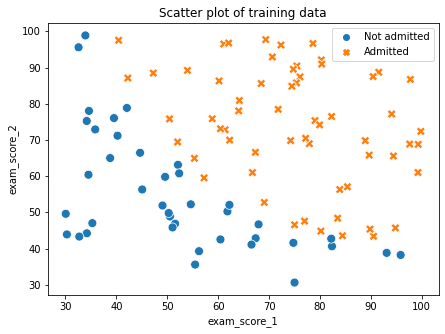

In [73]:
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x='exam_score_1', y='exam_score_2', hue='label', data=df, style='label', s=80)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:], ['Not admitted', 'Admitted'])
plt.title('Scatter plot of training data')
plt.show(ax)


In [36]:
def sigmoid(z):
    z = np.array(z)
    return 1 / (1+np.exp(-z))

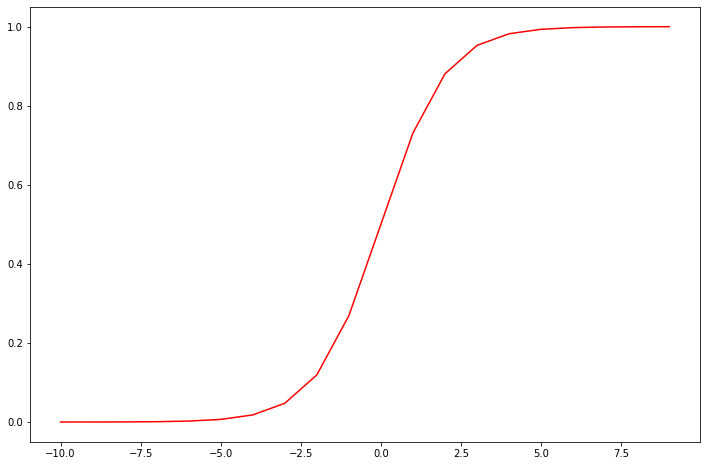

In [37]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')

In [38]:
iterations = 100
alpha = 0.01

In [51]:
X_df = pd.DataFrame(df.exam_score_1)
y_df = pd.DataFrame(df.exam_score_2)

In [63]:
def cost_function(theta, X, y):
    m = y.shape[0]
    theta = theta[:, np.newaxis] #trick to make numpy minimize work add new dim
    h = sigmoid(X.dot(theta))# dot =it is matrix multiplication, but using matmul
    J = (1/m) * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h)))#J(e) = (-y"log(h) – (1– y)"log(1 – h)) 


    diff_hy = h - y
    grad = (1/m) * diff_hy.T.dot(X)

    return J, grad

In [64]:
m = df.shape[0]
X = np.hstack((np.ones((m,1)),df[['exam_score_1', 'exam_score_2']].values))# hstack concatenation
y = np.array(df.label.values).reshape(-1,1)
initial_theta = np.zeros(shape=(X.shape[1]))

In [65]:
cost, grad = cost_function(initial_theta, X, y)
print('Cost at initial theta (zeros):', cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros):')
print(grad.T)
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628')

Cost at initial theta (zeros): [[0.69314718]]
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


In [66]:
test_theta = np.array([-24, 0.2, 0.2])
[cost, grad] = cost_function(test_theta, X, y)

print('Cost at test theta:', cost)
print('Expected cost (approx): 0.218')
print('Gradient at test theta:')
print(grad.T)
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647')

Cost at test theta: [[0.21833019]]
Expected cost (approx): 0.218
Gradient at test theta:
[[0.04290299]
 [2.56623412]
 [2.64679737]]
Expected gradients (approx):
 0.043
 2.566
 2.647


In [67]:
import scipy.optimize as opt
def optimize_theta(X, y, initial_theta):
    opt_results = opt.minimize(cost_function, initial_theta, args=(X, y), method='TNC',
                               jac=True, options={'maxiter':400})
    return opt_results['x'], opt_results['fun']

In [68]:
opt_theta, cost = optimize_theta(X, y, initial_theta)

In [69]:
print('Cost at theta found by fminunc:', cost)
print('Expected cost (approx): 0.203')
print('theta:\n', opt_theta.reshape(-1,1))
print('Expected theta (approx):')
print(' -25.161\n 0.206\n 0.201')

Cost at theta found by fminunc: [[0.2034977]]
Expected cost (approx): 0.203
theta:
 [[-25.16131856]
 [  0.20623159]
 [  0.20147149]]
Expected theta (approx):
 -25.161
 0.206
 0.201


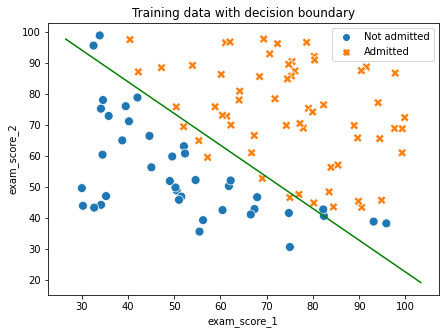

In [72]:
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x='exam_score_1', y='exam_score_2', hue='label', data=df, style='label', s=80)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:], ['Not admitted', 'Admitted']);

plt.title('Training data with decision boundary')

plot_x = np.array(ax.get_xlim())
plot_y = (-1/opt_theta[2]*(opt_theta[1]*plot_x + opt_theta[0]))
plt.plot(plot_x, plot_y, '-', c="green")
plt.show(ax)

In [74]:
prob = sigmoid(np.array([1, 45, 85]).dot(opt_theta))
print('For a student with scores 45 and 85, we predict an admission probability of', prob)
print('Expected value: 0.775 +/- 0.002');

For a student with scores 45 and 85, we predict an admission probability of 0.7762906223989715
Expected value: 0.775 +/- 0.002


In [75]:
def predict(X, theta):
    y_pred = [1 if sigmoid(X[i, :].dot(theta)) >= 0.5 else 0 for i in range(0, X.shape[0])]
    return y_pred

In [76]:
X = np.hstack((np.ones((m,1)),df[['exam_score_1', 'exam_score_2']].values))

y_pred_prob = predict(X, opt_theta)
f'Train accuracy: {np.mean(y_pred_prob == df.label.values) * 100}'

'Train accuracy: 89.0'

# By MOUHIHA Mohamed